In [12]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from src.constants import PROJECT_ROOT
from collections import defaultdict

In [13]:
OUTPUT_DIR = Path(PROJECT_ROOT / 'data/datasets/dataset_ver3')  # Замените на фактический путь, если необходимо

def count_images_per_class(output_dir):

    class_counts = defaultdict(int)

    for class_dir in output_dir.iterdir():
        if class_dir.is_dir() and class_dir.name.isdigit():
            class_label = class_dir.name
            for embryo_dir in class_dir.iterdir():
                
                if embryo_dir.is_dir():
                    image_count = len([f for f in embryo_dir.iterdir() if f.is_file() and f.suffix.lower() in ['.png', '.jpg', '.jpeg']])
                    class_counts[class_label] += image_count

    return class_counts

In [14]:
def plot_class_distribution(class_counts):

    classes = sorted(class_counts.keys(), key=lambda x: int(x))  # Сортировка по числовому значению классов
    counts = [class_counts[cls] for cls in classes]

    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))
    
    sns.barplot(x=classes, y=counts, palette="viridis")

    plt.xlabel('Класс', fontsize=12)
    plt.ylabel('Количество изображений', fontsize=12)
    plt.title('Распределение изображений по классам', fontsize=14)
    plt.xticks(rotation=0)

    for index, value in enumerate(counts):
        plt.text(index, value + max(counts)*0.01, str(value), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

In [15]:
def plot_class_distribution(class_counts):
    """
    Строит столбчатую диаграмму распределения классов.

    Args:
        class_counts (dict): Словарь с классами и соответствующим количеством изображений.
    """
    # Подготовка данных для графика
    classes = sorted(class_counts.keys(), key=lambda x: int(x))  # Сортировка по числовому значению классов
    counts = [class_counts[cls] for cls in classes]

    # Настройка стиля графика
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))
    
    # Построение столбчатой диаграммы
    sns.barplot(x=classes, y=counts, palette="viridis")

    # Добавление подписей и заголовка
    plt.xlabel('Класс', fontsize=12)
    plt.ylabel('Количество изображений', fontsize=12)
    plt.title('Распределение изображений по классам', fontsize=14)
    plt.xticks(rotation=0)

    # Добавление численных значений над столбцами
    for index, value in enumerate(counts):
        plt.text(index, value + max(counts)*0.01, str(value), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

Количество изображений в каждом классе:
Класс 1: 11139 изображений
Класс 2: 30900 изображений
Класс 3: 25067 изображений
Класс 4: 582 изображений


C:\Users\blade\AppData\Local\Temp\ipykernel_11828\2647554949.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=counts, palette="viridis")


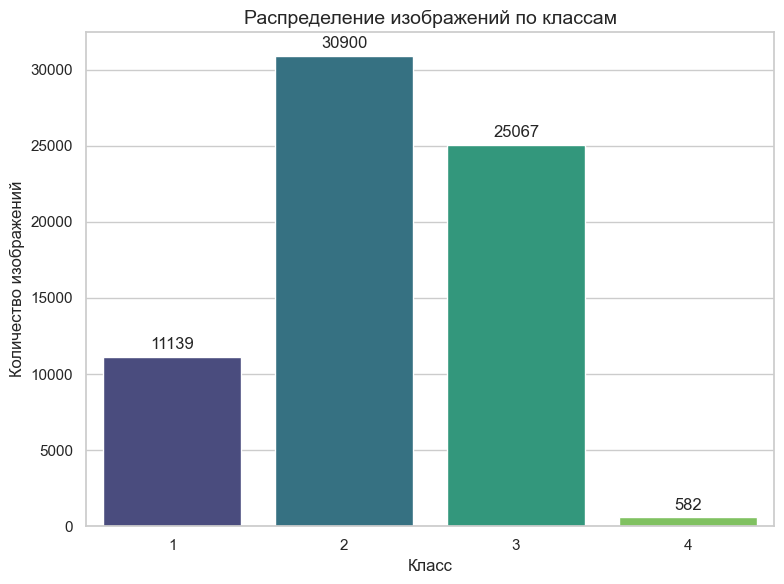

In [16]:
# Проверка существования директории
if not OUTPUT_DIR.exists():
    print(f"Директория {OUTPUT_DIR} не найдена.")

# Подсчет изображений в каждом классе
class_counts = count_images_per_class(OUTPUT_DIR)

# Проверка наличия данных
if not class_counts:
    print("Не найдено изображений в датасете.")

# Вывод результатов подсчета
print("Количество изображений в каждом классе:")
for cls, count in sorted(class_counts.items(), key=lambda x: int(x[0])):
    print(f"Класс {cls}: {count} изображений")

# Визуализация распределения классов
plot_class_distribution(class_counts)